In [79]:
 # Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [80]:
df = pd.read_csv("resources/wine-quality-white-and-red.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [81]:
df["is_white"] = pd.get_dummies(df.type, drop_first=True)

In [82]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [83]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [84]:
df = df.drop(["type"], axis=1)

<AxesSubplot:>

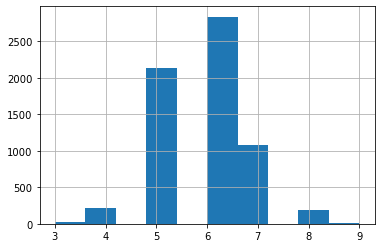

In [85]:
df["quality"].hist()

In [86]:
df["binary_quality"] = df["quality"] >=6
df.head(20)  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white,binary_quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,True
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,True
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,True
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,True
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,True
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,True
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1,True
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,True
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,True
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1,True


In [87]:
df = df.drop(["quality"], axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white,binary_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,True
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,True


In [88]:
df.binary_quality.value_counts()

True     4113
False    2384
Name: binary_quality, dtype: int64

In [89]:
df.binary_quality.describe()

count     6497
unique       2
top       True
freq      4113
Name: binary_quality, dtype: object

In [90]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'is_white', 'binary_quality'],
      dtype='object')

In [91]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 
        'is_white','binary_quality']
for col in cols:
    print(col)
    print(df[col].value_counts())
    print()

fixed acidity
6.80     354
6.60     327
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: fixed acidity, Length: 106, dtype: int64

volatile acidity
0.280    286
0.240    266
0.260    256
0.250    238
0.220    235
        ... 
0.975      1
1.070      1
0.950      1
1.090      1
0.905      1
Name: volatile acidity, Length: 187, dtype: int64

citric acid
0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
1.66      1
1.23      1
0.99      1
0.88      1
0.75      1
Name: citric acid, Length: 89, dtype: int64

residual sugar
2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
12.05      1
6.95       1
9.55       1
20.15      1
3.45       1
Name: residual sugar, Length: 316, dtype: int64

chlorides
0.044    206
0.036    200
0.042    187
0.046    185
0.040    182
        ... 
0.610      1
0.290      1
0.360      1
0.239      1
0.230      1
Name: chlorides, Length: 214, dtype

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
is_white                  -0.486740         -0.653036     0.187397   
binary_quality            -0.067354         -0.267046     0.075739   

                   

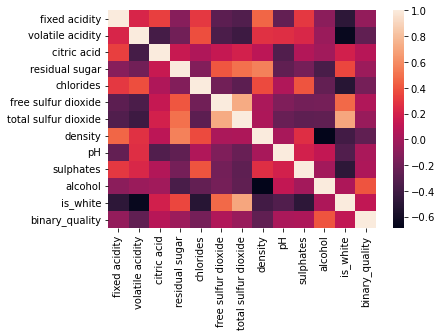

In [92]:
# check correlations
corrs = df.corr()
print(corrs)
print()
sns.heatmap(corrs)
plt.show()

In [93]:
 abs(df.corr()["binary_quality"]).sort_values(ascending=False)

binary_quality          1.000000
alcohol                 0.394676
density                 0.268876
volatile acidity        0.267046
chlorides               0.181908
is_white                0.116595
citric acid             0.075739
fixed acidity           0.067354
total sulfur dioxide    0.047585
free sulfur dioxide     0.044819
sulphates               0.035807
residual sugar          0.032484
pH                      0.018842
Name: binary_quality, dtype: float64

In [94]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = df.loc[:, features].values
y = df.loc[:, ["binary_quality"]].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.8 : 0.2


In [95]:
 # recipe
lr = LogisticRegression(max_iter=10000) # init
lr.fit(X_train, y_train) # fit

train_preds = lr.predict(X_train) # predict
test_preds = lr.predict(X_test)
test_proba = lr.predict_proba(X_test)

In [96]:
print(test_preds[0:10])
print()
print(test_proba[0:10]) 

[ True False  True  True  True  True  True  True False  True]

[[0.13818714 0.86181286]
 [0.5588958  0.4411042 ]
 [0.38312871 0.61687129]
 [0.06136781 0.93863219]
 [0.2163549  0.7836451 ]
 [0.34503636 0.65496364]
 [0.12737907 0.87262093]
 [0.26041414 0.73958586]
 [0.54599033 0.45400967]
 [0.05526431 0.94473569]]


In [97]:
output = f"""
METRICS FOR THE TRAINING SET:
----------------------------
{confusion_matrix(y_train, train_preds)}

{classification_report(y_train, train_preds)}
"""
print(output)

#################################################

output = f"""
METRICS FOR THE TESTING SET:
----------------------------
{confusion_matrix(y_test, test_preds)}

{classification_report(y_test, test_preds)}
"""
print(output)


METRICS FOR THE TRAINING SET:
----------------------------
[[1094  813]
 [ 532 2758]]

              precision    recall  f1-score   support

       False       0.67      0.57      0.62      1907
        True       0.77      0.84      0.80      3290

    accuracy                           0.74      5197
   macro avg       0.72      0.71      0.71      5197
weighted avg       0.74      0.74      0.74      5197



METRICS FOR THE TESTING SET:
----------------------------
[[253 224]
 [127 696]]

              precision    recall  f1-score   support

       False       0.67      0.53      0.59       477
        True       0.76      0.85      0.80       823

    accuracy                           0.73      1300
   macro avg       0.71      0.69      0.69      1300
weighted avg       0.72      0.73      0.72      1300




In [98]:
sum((y_test - test_proba[:,1])**2)

228.30258597634506

In [99]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[1094  813]
 [ 532 2758]]

                  precision    recall  f1-score   support

       False       0.67      0.57      0.62      1907
        True       0.77      0.84      0.80      3290

    accuracy                           0.74      5197
   macro avg       0.72      0.71      0.71      5197
weighted avg       0.74      0.74      0.74      5197

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[253 224]
 [127 696]]

                  precision    recall  f1-score   support

       False       0.67      0.53      0.59       477
        True       0.76      0.85      0.80       823

    accuracy                           0.73      1300
   macro avg       0.71      0.69      0.69      1300
weighted avg       0.72      0.73      0.72      1300

    

AUC for the Model Test Set: 0.7932424962618227


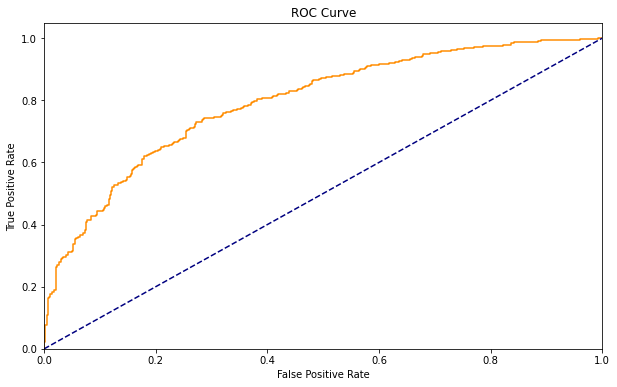

Brier Score:
228.30258597634506


In [100]:
lr = LogisticRegression(max_iter=30000)

evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 940  967]
 [ 481 2809]]

                  precision    recall  f1-score   support

       False       0.66      0.49      0.56      1907
        True       0.74      0.85      0.80      3290

    accuracy                           0.72      5197
   macro avg       0.70      0.67      0.68      5197
weighted avg       0.71      0.72      0.71      5197

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[205 272]
 [140 683]]

                  precision    recall  f1-score   support

       False       0.59      0.43      0.50       477
        True       0.72      0.83      0.77       823

    accuracy                           0.68      1300
   macro avg       0.65      0.63      0.63      1300
weighted avg       0.67      0.68      0.67      1300

    

AUC for the Model Test Set: 0.7047107402227877


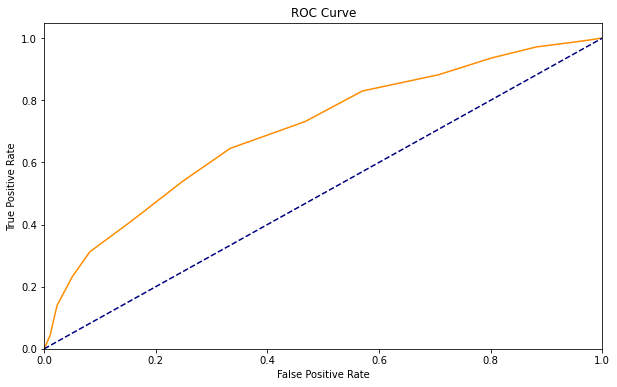

Brier Score:
267.3321799307949


In [101]:
knn_model = KNeighborsClassifier(n_neighbors=17)

evaluateModel(knn_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[  13 1894]
 [   3 3287]]

                  precision    recall  f1-score   support

       False       0.81      0.01      0.01      1907
        True       0.63      1.00      0.78      3290

    accuracy                           0.63      5197
   macro avg       0.72      0.50      0.39      5197
weighted avg       0.70      0.63      0.50      5197

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[  2 475]
 [  1 822]]

                  precision    recall  f1-score   support

       False       0.67      0.00      0.01       477
        True       0.63      1.00      0.78       823

    accuracy                           0.63      1300
   macro avg       0.65      0.50      0.39      1300
weighted avg       0.65      0.63      0.49      1300

    

AUC for the Model Test Set: 0.7264596722631066


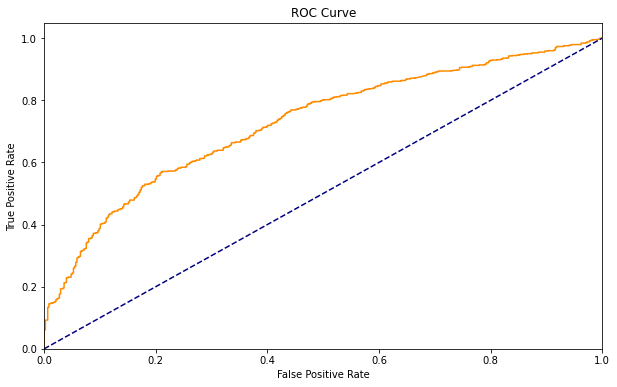

Brier Score:
266.43931080081995


In [102]:
svm_model = SVC(probability=True)

evaluateModel(svm_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[1907    0]
 [   0 3290]]

                  precision    recall  f1-score   support

       False       1.00      1.00      1.00      1907
        True       1.00      1.00      1.00      3290

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[338 139]
 [ 93 730]]

                  precision    recall  f1-score   support

       False       0.78      0.71      0.74       477
        True       0.84      0.89      0.86       823

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300

    

AUC for the Model Test Set: 0.9044605943892953


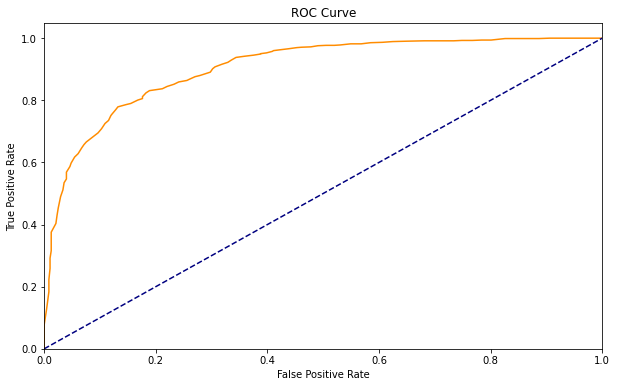

Brier Score:
155.64600000000027


In [103]:
rf = RandomForestClassifier()

evaluateModel(rf, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[1677  230]
 [ 162 3128]]

                  precision    recall  f1-score   support

       False       0.91      0.88      0.90      1907
        True       0.93      0.95      0.94      3290

    accuracy                           0.92      5197
   macro avg       0.92      0.92      0.92      5197
weighted avg       0.92      0.92      0.92      5197

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[321 156]
 [111 712]]

                  precision    recall  f1-score   support

       False       0.74      0.67      0.71       477
        True       0.82      0.87      0.84       823

    accuracy                           0.79      1300
   macro avg       0.78      0.77      0.77      1300
weighted avg       0.79      0.79      0.79      1300

    

AUC for the Model Test Set: 0.8742494988167746


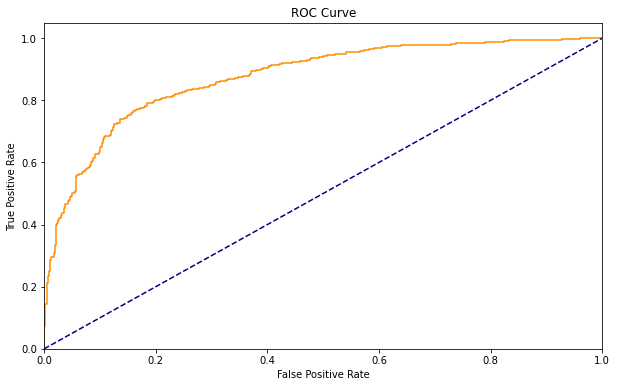

Brier Score:
178.7354030895291


In [104]:
lgb = LGBMClassifier()

evaluateModel(lgb, X_train, X_test, y_train, y_test)

In [105]:
from sklearn.ensemble import AdaBoostClassifier


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[1224  683]
 [ 486 2804]]

                  precision    recall  f1-score   support

       False       0.72      0.64      0.68      1907
        True       0.80      0.85      0.83      3290

    accuracy                           0.78      5197
   macro avg       0.76      0.75      0.75      5197
weighted avg       0.77      0.78      0.77      5197

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[266 211]
 [126 697]]

                  precision    recall  f1-score   support

       False       0.68      0.56      0.61       477
        True       0.77      0.85      0.81       823

    accuracy                           0.74      1300
   macro avg       0.72      0.70      0.71      1300
weighted avg       0.73      0.74      0.73      1300

    

AUC for the Model Test Set: 0.8004348258022116


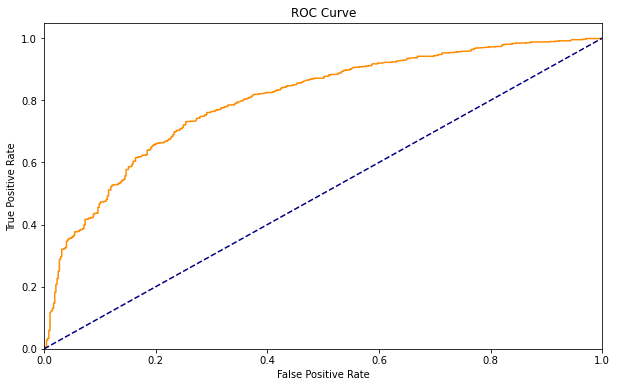

Brier Score:
317.7631127928712


In [106]:
ada = AdaBoostClassifier(random_state=42)

evaluateModel(ada, X_train, X_test, y_train, y_test)

In [107]:
sorted(list(zip(rf.feature_importances_, features)))

[(0.06647418311708161, 'fixed acidity'),
 (0.0729283568293157, 'pH'),
 (0.07569978917350298, 'residual sugar'),
 (0.07817714658304599, 'sulphates'),
 (0.07897936784233581, 'chlorides'),
 (0.08017271785348572, 'citric acid'),
 (0.08286327000187642, 'total sulfur dioxide'),
 (0.08373921551545527, 'free sulfur dioxide'),
 (0.1027622929891615, 'density'),
 (0.11512727840870335, 'volatile acidity'),
 (0.16307638168603567, 'alcohol')]

In [108]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [44]:
lr.predict([[10,1,.07,5,.05,25,115,1,3,.5,9,6]])

array([0], dtype=uint8)